## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("rideshare_kaggle.csv")

In [3]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
duplicate = data[data.duplicated()]
duplicate

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [6]:
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
data["price"].shape

(693071,)

In [8]:
data.price.isna().sum()

55095

In [9]:
data.price.notna().sum()

637976

In [10]:
ratio_nan = data["price"].isna().sum()*100/len(data)
print("Ratio data nan adalah", ratio_nan,"%")

Ratio data nan adalah 7.949402009317948 %


In [11]:
ratio_nan = data["price"].notna().sum()*100/len(data)
print("Ratio data not nan adalah", ratio_nan,"%")

Ratio data not nan adalah 92.05059799068205 %


karena data nan masih berkisar sekitar 8% dari keseluruhan data, maka saya akan mendrop data yang nan

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [14]:
data.shape

(637976, 57)

In [15]:
print(data.columns.tolist())

['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


## Eksplorasi Data

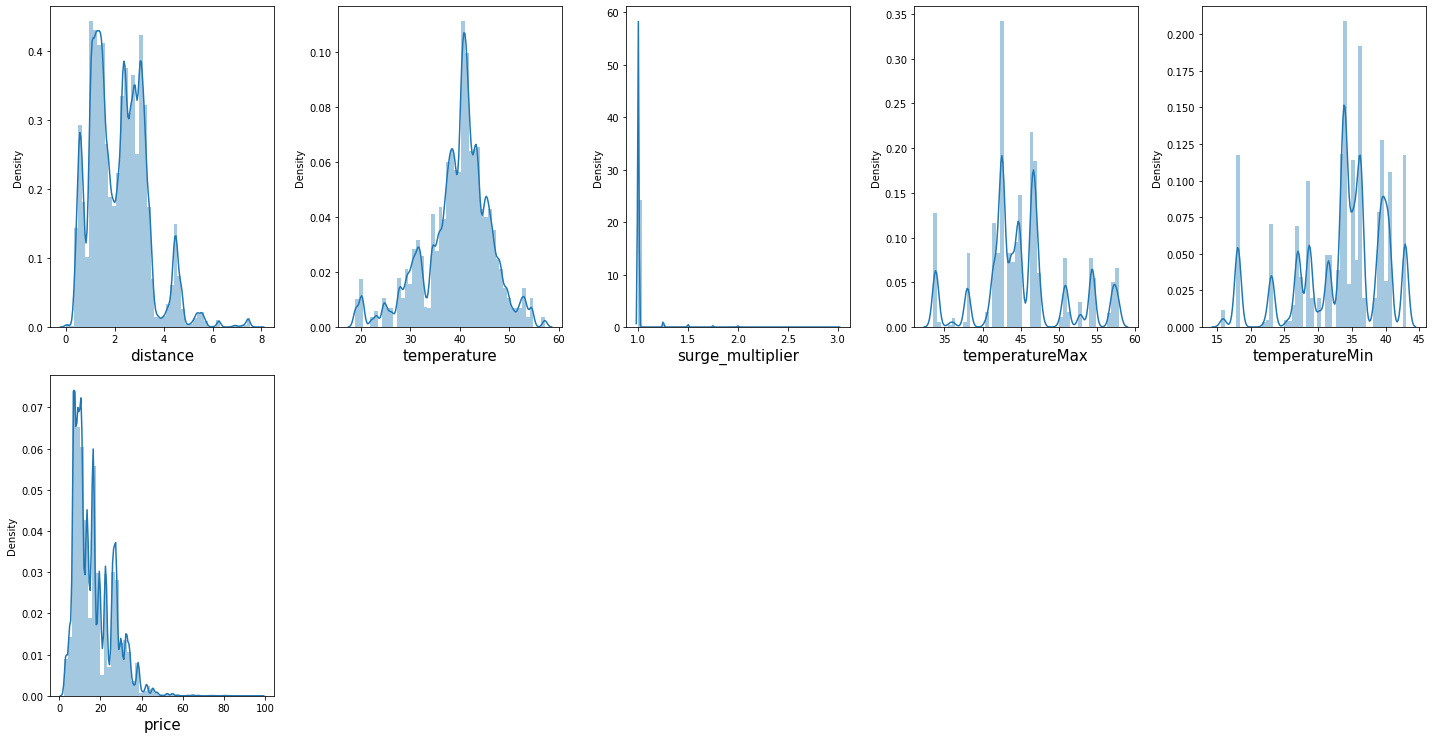

In [16]:
col = ["distance", "temperature", "surge_multiplier","temperatureMax", "temperatureMin", "price"]
plt.figure(figsize = (20, 15))
plotnumber = 1

for i in col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [17]:
n = data["name"].value_counts()
name=pd.DataFrame(n)
name

,name
UberXL,55096
WAV,55096
Black SUV,55096
Black,55095
UberX,55094
UberPool,55091
Lux,51235
Lyft,51235
Lux Black XL,51235
Lyft XL,51235


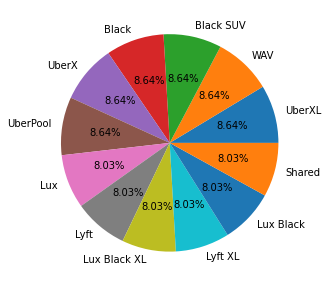

In [18]:
plt.figure(figsize=(10,5))
plt.pie(name['name'], labels=name.index,autopct='%.2f%%')
plt.show()

Uber merupakan jenis cab yang paling banyak digunakan oleh konsumen

In [19]:
c = data["cab_type"].value_counts()
cab=pd.DataFrame(c)
cab

,cab_type
Uber,330568
Lyft,307408


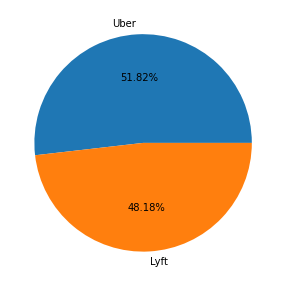

In [20]:
plt.figure(figsize=(10,5))
plt.pie(cab['cab_type'], labels=cab.index,autopct='%.2f%%')
plt.show()

Terdapat sekitar 52% konsumen memilih Uber dibandingkan dengan Lyft

In [21]:
pr = data.groupby("name")["price"].max()
pr = pd.DataFrame(pr)
pr

,price
name,
Black,68.5
Black SUV,89.5
Lux,55.0
Lux Black,75.0
Lux Black XL,97.5
Lyft,38.5
Lyft XL,65.0
Shared,22.5
UberPool,42.5


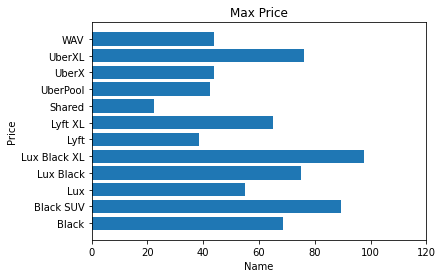

In [22]:
plt.barh(pr.index, pr['price'])
plt.xlabel('Name')
plt.ylabel('Price')
plt.title('Max Price')
plt.xlim(0, 120)
plt.show()

Lux Black XL merupakan harga yang paling mahal, dan shared yang paling murah

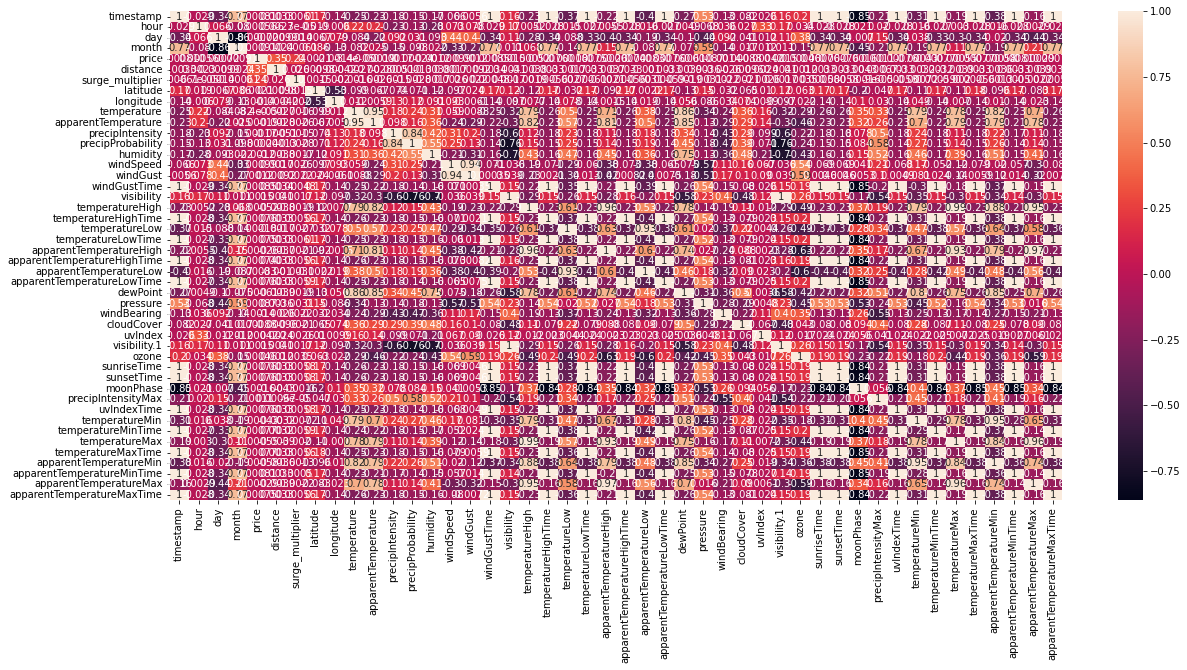

In [23]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [24]:
korelasi = pd.DataFrame(data.corr())
korelasi.sort_values("price", ascending=False)

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,...,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,...,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,...,-0.047307,0.171976,-0.114437,0.169740,-0.109271,0.175336,-0.096327,0.171069,-0.082894,0.173359
visibility.1,0.158577,0.173776,0.105210,0.011129,0.001497,0.004143,0.001716,0.124286,-0.097102,-0.324158,...,-0.544535,0.151716,-0.352681,0.152038,-0.297030,0.154259,-0.343779,0.141784,-0.297609,0.154883
visibility,0.158577,0.173776,0.105210,0.011129,0.001497,0.004143,0.001716,0.124286,-0.097102,-0.324158,...,-0.544535,0.151716,-0.352681,0.152038,-0.297030,0.154259,-0.343779,0.141784,-0.297609,0.154883
windGust,0.005565,0.077646,0.402611,-0.270541,0.001218,0.000920,0.002162,0.024346,-0.006145,-0.008775,...,0.100315,0.004860,0.081460,0.023537,-0.144428,-0.005918,-0.116490,0.014032,-0.316142,-0.007186
precipIntensityMax,-0.211887,0.020288,0.145789,-0.213301,0.001114,0.000670,-0.000090,-0.047307,0.030330,0.333160,...,1.000000,-0.209518,0.446422,-0.209992,0.180394,-0.213661,0.409563,-0.188269,0.157555,-0.215982
windSpeed,-0.066364,0.073011,0.440512,-0.334897,0.000990,0.001709,0.002593,-0.097125,0.092773,0.058846,...,0.212359,-0.068176,0.174181,-0.051533,-0.120540,-0.078561,-0.019857,-0.056577,-0.304331,-0.079719
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,...,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962


Distance dan Surge multiplier merupakan feature yang memiliki korelasi cukup tinggi dengan kolom price

In [25]:
data_new = data[["name", "distance", "surge_multiplier", "price"]]
data_new

,name,distance,surge_multiplier,price
0,Shared,0.44,1.0,5.0
1,Lux,0.44,1.0,11.0
2,Lyft,0.44,1.0,7.0
3,Lux Black XL,0.44,1.0,26.0
4,Lyft XL,0.44,1.0,9.0
...,...,...,...,...
693065,WAV,1.00,1.0,9.5
693066,UberXL,1.00,1.0,13.0
693067,UberX,1.00,1.0,9.5
693069,Black SUV,1.00,1.0,27.0


In [26]:
data_new.describe()

,distance,surge_multiplier,price
count,637976.000000,637976.000000,637976.000000
mean,2.189261,1.015068,16.545125
std,1.135413,0.095422,9.324359
min,0.020000,1.000000,2.500000
25%,1.270000,1.000000,9.000000
50%,2.160000,1.000000,13.500000
75%,2.930000,1.000000,22.500000
max,7.860000,3.000000,97.500000


In [27]:
print("Q1 Dari data Distance adalah", np.quantile(data_new.distance, 0.25))
print("Q2 Dari data Distance adalah", np.quantile(data_new.distance, 0.5))
print("Q3 Dari data Distance adalah", np.quantile(data_new.distance, 0.75))
IQR = (np.quantile(data_new.distance, 0.75)) - (np.quantile(data_new.distance, 0.25))
print("IQR Dari data Distance adalah", IQR)
print("Lower", np.quantile(data_new.distance, 0.25)-(1.5*IQR))
print("Upper", np.quantile(data_new.distance, 0.75)+(1.5*IQR))

Q1 Dari data Distance adalah 1.27
Q2 Dari data Distance adalah 2.16
Q3 Dari data Distance adalah 2.93
IQR Dari data Distance adalah 1.6600000000000001
Lower -1.2200000000000002
Upper 5.42


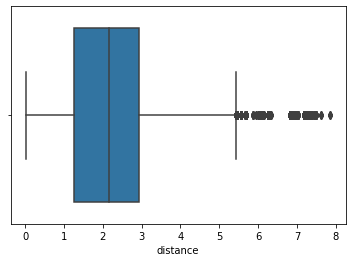

In [28]:
sns.boxplot(x='distance', data=data_new)
plt.show()

In [29]:
data_new[data_new["distance"]==0.02]

,name,distance,surge_multiplier,price
11272,WAV,0.02,1.0,7.5
11274,Black,0.02,1.0,15.0
11275,UberX,0.02,1.0,7.5
11276,UberXL,0.02,1.0,9.5
11277,UberPool,0.02,1.0,7.5
11278,Black SUV,0.02,1.0,27.5
172932,Black SUV,0.02,1.0,27.5
172934,WAV,0.02,1.0,6.5
172935,Black,0.02,1.0,15.0
172936,UberXL,0.02,1.0,8.5


In [30]:
data_new[data_new["price"]==97.5]

,name,distance,surge_multiplier,price
597071,Lux Black XL,4.43,2.0,97.5


Dari data diatas, terdapat outliers di bagian distance, tetapi di kolom describe, data tersebut masih termasuk kedalam data yang masuk akal untuk data yang menggambarkan jarak, sehingga tidak saya lakukan handling outliers

In [31]:
data_new["name"].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [32]:
data_new

,name,distance,surge_multiplier,price
0,Shared,0.44,1.0,5.0
1,Lux,0.44,1.0,11.0
2,Lyft,0.44,1.0,7.0
3,Lux Black XL,0.44,1.0,26.0
4,Lyft XL,0.44,1.0,9.0
...,...,...,...,...
693065,WAV,1.00,1.0,9.5
693066,UberXL,1.00,1.0,13.0
693067,UberX,1.00,1.0,9.5
693069,Black SUV,1.00,1.0,27.0


In [33]:
dat = pd.get_dummies(data_new, columns=["name"])
dat

,distance,surge_multiplier,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,13.0,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,27.0,0,1,0,0,0,0,0,0,0,0,0,0


## Modeling

In [34]:
#Feature
X = dat.drop("price", axis=1)
y = dat["price"]

In [35]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [36]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_linear_train = lin.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = lin.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.9272403868928975
R2_score (test):  0.9273967937335059
RMSE:  2.515865299316228


In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
lin2 = LinearRegression()
lin2.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_linear_train = lin2.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = lin2.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.9272403876776187
R2_score (test):  0.9273967765063609
RMSE:  2.515865597795979


In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
lin3 = LinearRegression()
lin3.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred_linear_train = lin3.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = lin3.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.9272403972518908
R2_score (test):  0.9273963209219597
RMSE:  2.5158734912975946


Dari percobaan data diatas menggunakan scalling dan tidak, nilai R2 tidak jauh berbeda, berada di sekitar 0.92 dan RMSE berada di sekitar 2.51, sehingga saya memilih model tanpa scalling

In [44]:
X = dat.drop("price", axis=1)
y = dat["price"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

## Predict

In [46]:
#Proses prediksi nilai Y berdasarkan variabel X_test
y_pred = lin.predict(X_test)

In [47]:
predicted = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
predicted.head()

,Actual,Predicted
526491,7.0,12.524521
506474,10.5,11.469936
139551,7.0,5.842915
235222,15.5,16.972874
140436,16.5,19.400814


In [48]:
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [49]:
sam = data.sample(n=50, replace=True, random_state=5)

In [50]:
sam.shape

(50, 57)

In [51]:
sam.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
323378,9073e784-73ba-41bb-b55d-1a3942835a2f,1.543412e+09,13,28,11,2018-11-28 13:41:08,America/New_York,Theatre District,Boston University,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
20224,96bbc9a0-cc4d-44b0-b8a6-c461eea72516,1.543594e+09,16,30,11,2018-11-30 16:08:05,America/New_York,West End,North End,Uber,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
591719,9fd69efc-ac78-49af-9ec4-440f683edc64,1.543240e+09,13,26,11,2018-11-26 13:50:10,America/New_York,Financial District,Boston University,Lyft,...,0.1228,1543251600,40.39,1543233600,46.50,1543255200,37.08,1543291200,43.82,1543244400
135354,9f132b54-fdf7-46d4-9778-4c7551f79b09,1.543624e+09,0,1,12,2018-12-01 00:27:59,America/New_York,Beacon Hill,Fenway,Lyft,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
606195,90ddf27f-01d0-4c42-8c7c-9cf3853fb53d,1.543710e+09,0,2,12,2018-12-02 00:23:03,America/New_York,West End,Boston University,Lyft,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800


In [52]:
sam = sam[["name", "distance", "surge_multiplier", "price"]]
sam.head()

,name,distance,surge_multiplier,price
323378,Lux,3.11,1.0,22.5
20224,UberXL,0.98,1.0,13.0
591719,Lyft XL,5.41,1.0,22.5
135354,Lyft XL,2.41,1.0,13.5
606195,Lyft,2.88,1.0,10.5


In [53]:
sam1 = pd.get_dummies(sam, columns=["name"])
sam1

,distance,surge_multiplier,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
323378,3.11,1.0,22.5,0,0,1,0,0,0,0,0,0,0,0,0
20224,0.98,1.0,13.0,0,0,0,0,0,0,0,0,0,0,1,0
591719,5.41,1.0,22.5,0,0,0,0,0,0,1,0,0,0,0,0
135354,2.41,1.0,13.5,0,0,0,0,0,0,1,0,0,0,0,0
606195,2.88,1.0,10.5,0,0,0,0,0,1,0,0,0,0,0,0
37702,2.44,1.0,22.5,0,0,0,1,0,0,0,0,0,0,0,0
180597,1.50,1.0,7.0,0,0,0,0,0,0,0,0,1,0,0,0
625741,2.77,1.0,32.5,0,0,0,0,1,0,0,0,0,0,0,0
501258,1.09,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0
306566,1.30,1.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
predsam = sam1.drop(columns=['price'],axis=1)
predsam

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
323378,3.11,1.0,0,0,1,0,0,0,0,0,0,0,0,0
20224,0.98,1.0,0,0,0,0,0,0,0,0,0,0,1,0
591719,5.41,1.0,0,0,0,0,0,0,1,0,0,0,0,0
135354,2.41,1.0,0,0,0,0,0,0,1,0,0,0,0,0
606195,2.88,1.0,0,0,0,0,0,1,0,0,0,0,0,0
37702,2.44,1.0,0,0,0,1,0,0,0,0,0,0,0,0
180597,1.50,1.0,0,0,0,0,0,0,0,0,1,0,0,0
625741,2.77,1.0,0,0,0,0,1,0,0,0,0,0,0,0
501258,1.09,1.0,0,0,0,0,0,0,0,1,0,0,0,0
306566,1.30,1.0,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
pp = lin.predict(predsam)
pp

array([19.66973495, 12.29722595, 23.62491989, 15.2378273 , 10.84721375,
       23.09113693,  6.82420349, 33.26528931,  2.96323395, 13.19184875,
       32.84593201, 31.47603989, 11.32385254, 11.64036942, 12.46860504,
        7.10377121,  5.5381813 , 29.57496643,  3.99764252, 33.18689346,
        8.14574814, 29.32335281, 17.93640137, 33.88034058,  8.66656876,
       19.20511627, 33.85238266,  4.8672142 , 27.03636169, 40.64592743,
       17.58792877,  6.54950714, 11.12303162,  8.00596237, 18.38371277,
       15.46011353, 11.18548965, 11.46993637, 21.52814865, 11.12957764,
       21.72555923, 12.44842911, 16.88216782, 26.92556   ,  8.38699722,
       11.49022293, 28.74173737, 19.98791122, 22.06104279, 34.43947983])

In [56]:
sam.insert(loc = 4, column='pricepredict', value=pp)

In [57]:
sam

,name,distance,surge_multiplier,price,pricepredict
323378,Lux,3.11,1.0,22.5,19.669735
20224,UberXL,0.98,1.0,13.0,12.297226
591719,Lyft XL,5.41,1.0,22.5,23.624920
135354,Lyft XL,2.41,1.0,13.5,15.237827
606195,Lyft,2.88,1.0,10.5,10.847214
37702,Lux Black,2.44,1.0,22.5,23.091137
180597,UberPool,1.50,1.0,7.0,6.824203
625741,Lux Black XL,2.77,1.0,32.5,33.265289
501258,Shared,1.09,1.0,5.0,2.963234
306566,UberXL,1.30,1.0,14.0,13.191849


Hasil dari predict menggunakan model linear regressi ini sudah cukup bagus, nilai predict dengan nilai actual tidak terlalu memiliki perbedaan yang jauh